In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Softmax Regression

Softmax regression is a generalization of logistic regression to the case where we want to handle multiple classes (k  classes)

In [2]:
def softmax(X,theta):
    m,n = X.shape
    Y = np.exp(X.dot(theta))
    row_sum = np.sum(Y,axis=1)[:,None]
    return Y/row_sum

In [3]:
# check that it works; notice that the entries of each row add to 1'
X = np.random.randn(5,3)
theta = np.random.randn(3,2)
softmax(X,theta)

array([[3.85729074e-01, 6.14270926e-01],
       [4.57369722e-01, 5.42630278e-01],
       [9.99429051e-01, 5.70948529e-04],
       [3.30614661e-03, 9.96693853e-01],
       [5.57351713e-01, 4.42648287e-01]])

In [4]:
def one_hot_encoding(y):
    Y = np.zeros((len(y),len(np.unique(y))))
    Y[np.arange(len(y)),y] = 1
    return Y

In [5]:
# chekc that it works
y = np.array([0,1,1,3,4,2,2,0])
Y = one_hot_encoding(y)
Y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [6]:
def softmax_cost(X,theta,y):
    m = X.shape[0]
    Y = one_hot_encoding(y)
    P = softmax(X,theta)
    return (-1/m)*np.sum(Y*np.log(P))

In [7]:
def softmaxregression_GD(X,y,learning_rate,n_epochs, return_cost=False):
    
    m,n = X.shape
    k = len(np.unique(y))
        
    # initialize vector theta
    theta = np.random.randn(n,k)
    
    # initialize cost vector
    if return_cost:
        cost = np.zeros(n_epochs)
    
    # one-hot encoding
    Y = one_hot_encoding(y)
    
    # gradient descent iterations  
    for i in range(n_epochs):
        gradient = (1/m)*X.T.dot(softmax(X,theta)-Y)
        theta = theta - learning_rate * gradient
        if return_cost:
            cost[i] = softmax_cost(X,theta,y)
            
    # store results        
    results = {}
    results['theta'] = theta
    if return_cost:
        results['cost'] = cost
        
    return results

## Example: The Iris Dataset

In [8]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
data = pd.read_csv(url)
data.head(5) #first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()
y = data['species'].to_numpy()

In [11]:
# map classes to (0,1,2)
y[y=='Iris-setosa']=0
y[y=='Iris-versicolor']=1
y[y=='Iris-virginica']=2
y = y.astype(int)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# one hot encoding
Y = one_hot_encoding(y)

In [14]:
s = 0.05
n_iterations = 1000
results = softmaxregression_GD(X,y,
                               learning_rate = 0.1,
                               n_epochs=1000,
                               return_cost=True)

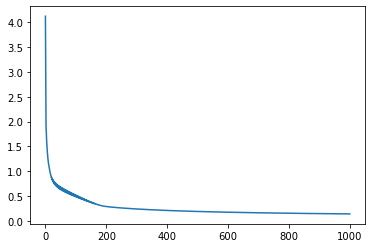

In [15]:
cost = results['cost']
plt.plot(cost)

In [16]:
theta = results['theta']

In [17]:
P = softmax(X,theta)
np.round(P,3) #round entries of P to three decimals

array([[0.992, 0.008, 0.   ],
       [0.965, 0.035, 0.   ],
       [0.987, 0.013, 0.   ],
       [0.976, 0.024, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.992, 0.008, 0.   ],
       [0.988, 0.012, 0.   ],
       [0.967, 0.033, 0.   ],
       [0.973, 0.027, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.987, 0.013, 0.   ],
       [0.971, 0.029, 0.   ],
       [0.988, 0.012, 0.   ],
       [0.998, 0.002, 0.   ],
       [0.999, 0.001, 0.   ],
       [0.997, 0.003, 0.   ],
       [0.991, 0.009, 0.   ],
       [0.991, 0.009, 0.   ],
       [0.996, 0.004, 0.   ],
       [0.976, 0.024, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.998, 0.002, 0.   ],
       [0.964, 0.036, 0.   ],
       [0.979, 0.021, 0.   ],
       [0.946, 0.054, 0.   ],
       [0.982, 0.018, 0.   ],
       [0.99 , 0.01 , 0.   ],
       [0.988, 0.012, 0.   ],
       [0.978, 0.022, 0.   ],
       [0.967, 0.033, 0.   ],
       [0.979, 0.021, 0.   ],
       [0.999, 0.001, 0.   ],
       [0.

In [18]:
def predictor_softmax(X,theta):
    P = softmax(X,theta)
    return np.argmax(P,axis=1)

In [19]:
y_pred = predictor_softmax(X,theta)

In [20]:
'Confusion matrix'
C = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        C[i,j]=sum(y_pred[y==i]==j)
C

array([[50.,  0.,  0.],
       [ 0., 46.,  4.],
       [ 0.,  0., 50.]])

In [21]:
'percentage of incorrect classification'
100*np.sum(y_pred==y)/len(y)

97.33333333333333